In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
# Step 1: Data Generation
np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=1.0, size=(100, 2))
X2 = np.random.normal(loc=[8, 8], scale=1.5, size=(100, 2))
X = np.vstack((X1, X2))

In [5]:
X.shape

(200, 2)

In [6]:
# Step 2: GMM Initialization and Fitting
gmm = GaussianMixture(
    n_components=2,                # Number of clusters
    covariance_type='full',        # Full covariance matrix
    max_iter=300,                  # Maximum number of iterations
    tol=1e-4,                      # Convergence tolerance
    random_state=42                # Random seed for reproducibility
)
gmm.fit(X)

GaussianMixture(max_iter=300, n_components=2, random_state=42, tol=0.0001)

In [7]:
# Step 3: Predictions and Evaluation
labels = gmm.predict(X)
probabilities = gmm.predict_proba(X)  # Soft clustering probabilities
silhouette = silhouette_score(X, labels)

In [8]:
# Step 4: Displaying GMM Parameters
print(f"Means:\n{gmm.means_}")
print(f"Covariances:\n{gmm.covariances_}")
print(f"Weights (Mixing Coefficients):\n{gmm.weights_}")
print(f"Silhouette Score: {silhouette:.4f}")

Means:
[[1.8848211  2.03538418]
 [8.19391939 8.06571592]]
Covariances:
[[[ 0.72620145  0.02907252]
  [ 0.02907252  0.99348128]]

 [[ 2.40026394 -0.18345192]
  [-0.18345192  1.94630652]]]
Weights (Mixing Coefficients):
[0.50015309 0.49984691]
Silhouette Score: 0.7554


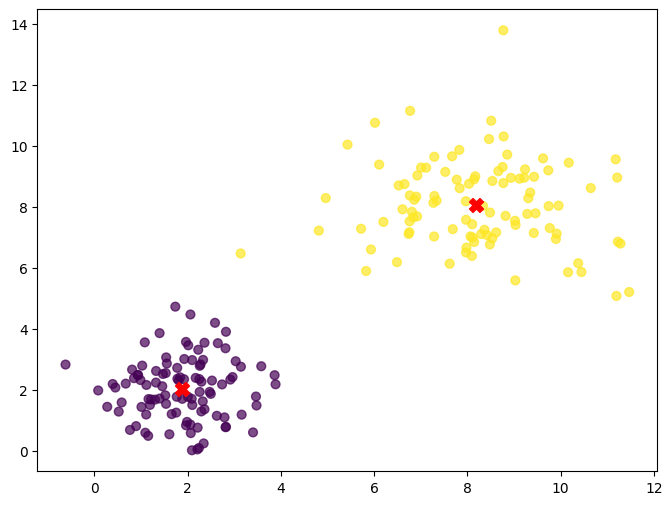

In [9]:
# Step 5: Visualization of Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, alpha=0.7, label='Data Points')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=100, label='Centroids')

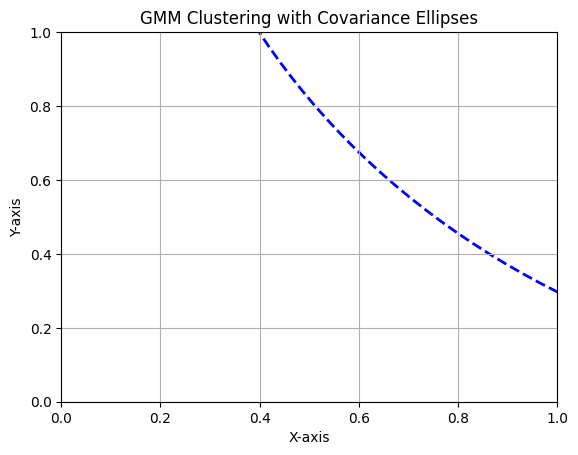

In [12]:
# Visualize cluster boundaries
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def plot_cov_ellipse(mean, cov, ax, n_std=2.0, edgecolor='blue'):
    """Plot covariance ellipse for GMM components."""
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      edgecolor=edgecolor, facecolor='none', linestyle='--', linewidth=2)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

ax = plt.gca()
for mean, cov in zip(gmm.means_, gmm.covariances_):
    plot_cov_ellipse(mean, cov, ax)

plt.title('GMM Clustering with Covariance Ellipses')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.legend()
plt.grid(True)
plt.show()